In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_movies = pd.read_csv('/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')
df_movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [3]:
df_movies_copy = df_movies.copy()
df_movies_copy.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
df_movies_copy.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [5]:
df_movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [6]:
df_movies_copy.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [7]:
df_movies_copy.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

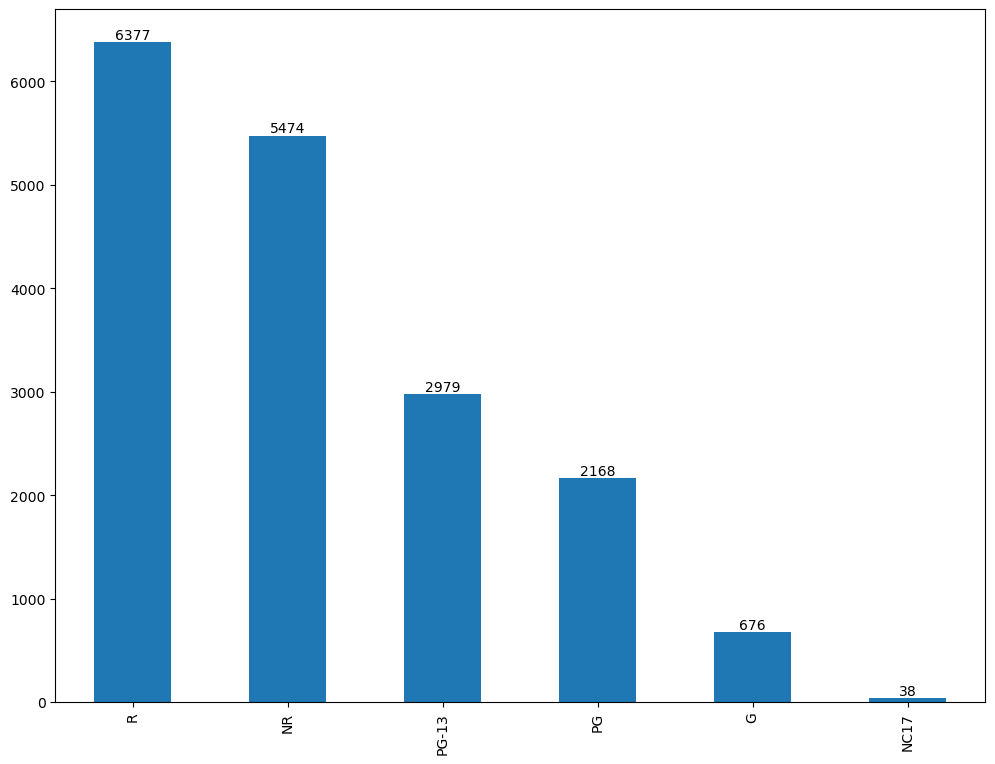

In [8]:
print(f'Content Rating category: {df_movies_copy.content_rating.unique()}')

ax = df_movies_copy.content_rating.value_counts().plot(kind='bar', figsize = (12,9))
ax.bar_label(ax.containers[0])

In [9]:
content_rating = pd.get_dummies(df_movies_copy.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audiance status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

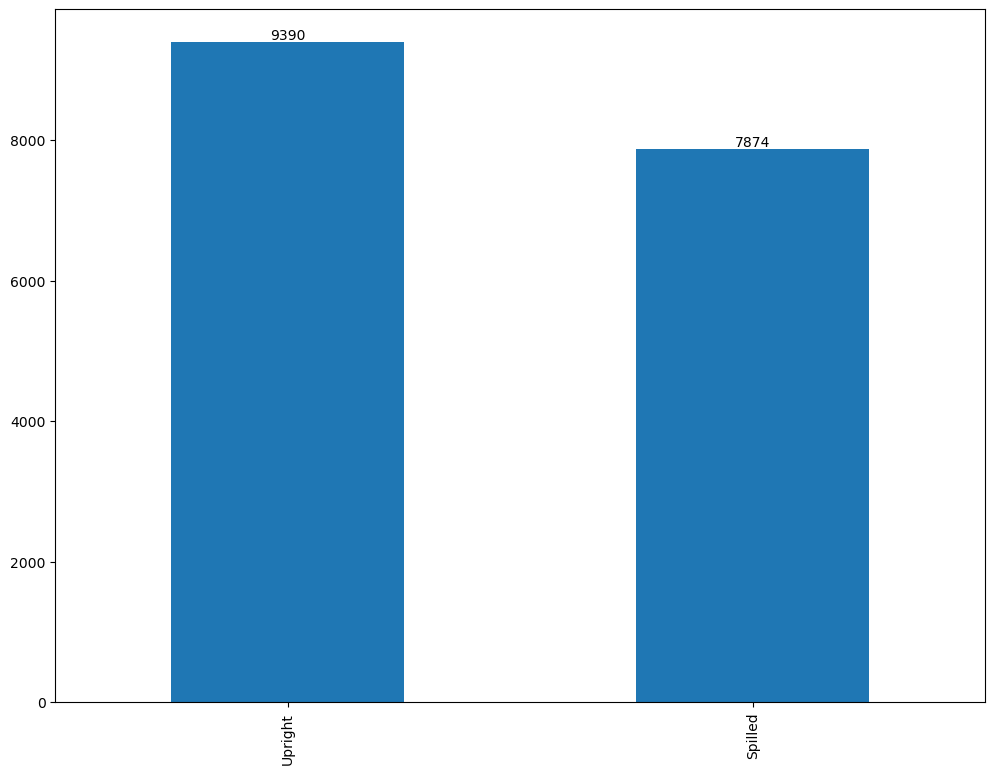

In [10]:
print(f'Audiance status category: {df_movies_copy.audience_status.unique()}')

ax = df_movies_copy.audience_status.value_counts().plot(kind='bar', figsize = (12,9))
ax.bar_label(ax.containers[0])

In [11]:
# Encoding audience status variable with ordinal encoding

audience_status = pd.DataFrame(df_movies_copy.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [12]:
# Encode tomatometer status variable with ordinal encoding

tomatometer_status = pd.DataFrame(df_movies_copy.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status.head()

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


In [13]:
df_feature = pd.concat([df_movies_copy[['runtime','tomatometer_rating','tomatometer_count','audience_rating','audience_count','tomatometer_rotten_critics_count']], content_rating,audience_status,tomatometer_status],axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,3,1,0,0,0,0,0,1.0,1.0


In [14]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [15]:
len(df_feature)

17017

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

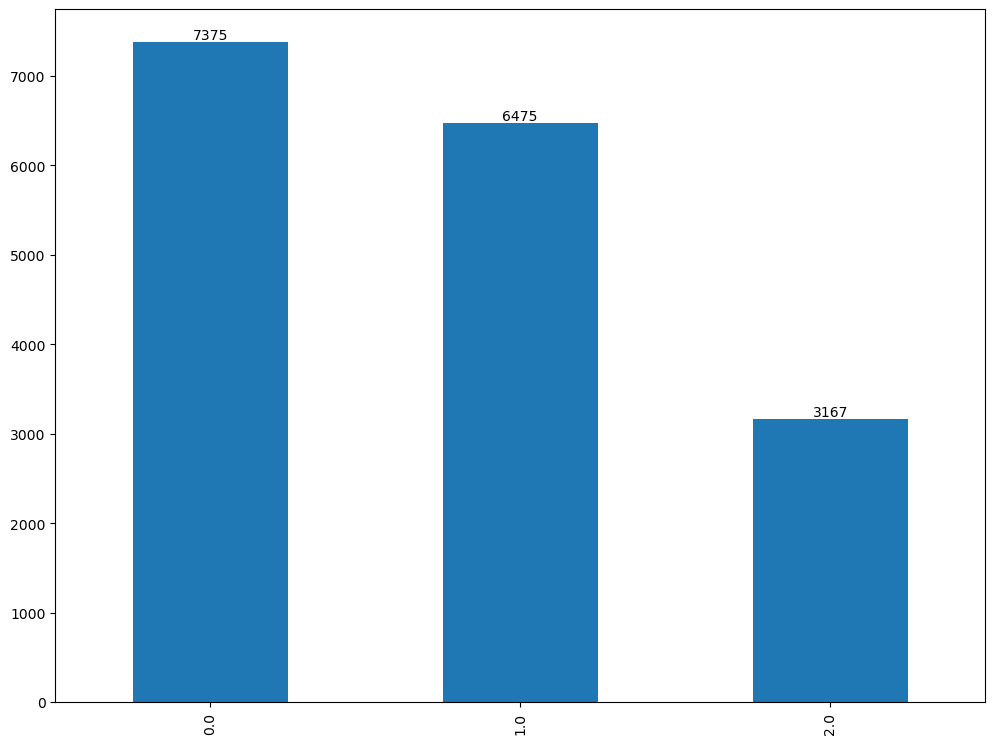

In [16]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize = (12,9))
ax.bar_label(ax.containers[0])

In [17]:
X_train, X_test, Y_train, Y_test  = train_test_split(df_feature.drop(['tomatometer_status'],axis=1),df_feature.tomatometer_status, test_size=0.2, random_state= 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


### Exploring Decision tree Classifiers

In [18]:
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = 2) 

In [19]:
tree_3_leaf.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [20]:
y_predict = tree_3_leaf.predict(X_test)

In [21]:
print(accuracy_score(Y_test,y_predict))
print(classification_report(Y_test, y_predict))

0.9456521739130435
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       1.00      0.86      0.92      1286
         2.0       0.77      1.00      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.95      0.93      3404
weighted avg       0.96      0.95      0.95      3404



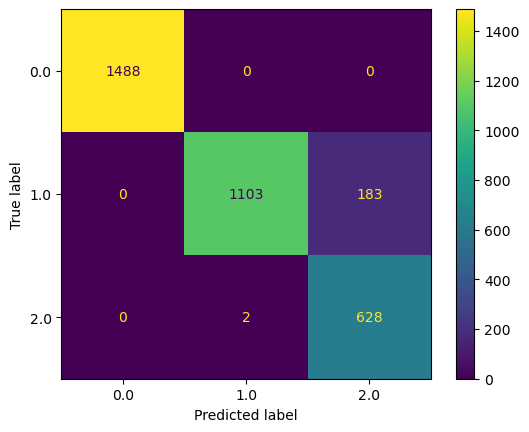

In [22]:
cm = confusion_matrix(Y_test, y_predict, labels=tree_3_leaf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree_3_leaf.classes_)
disp.plot()
plt.show()

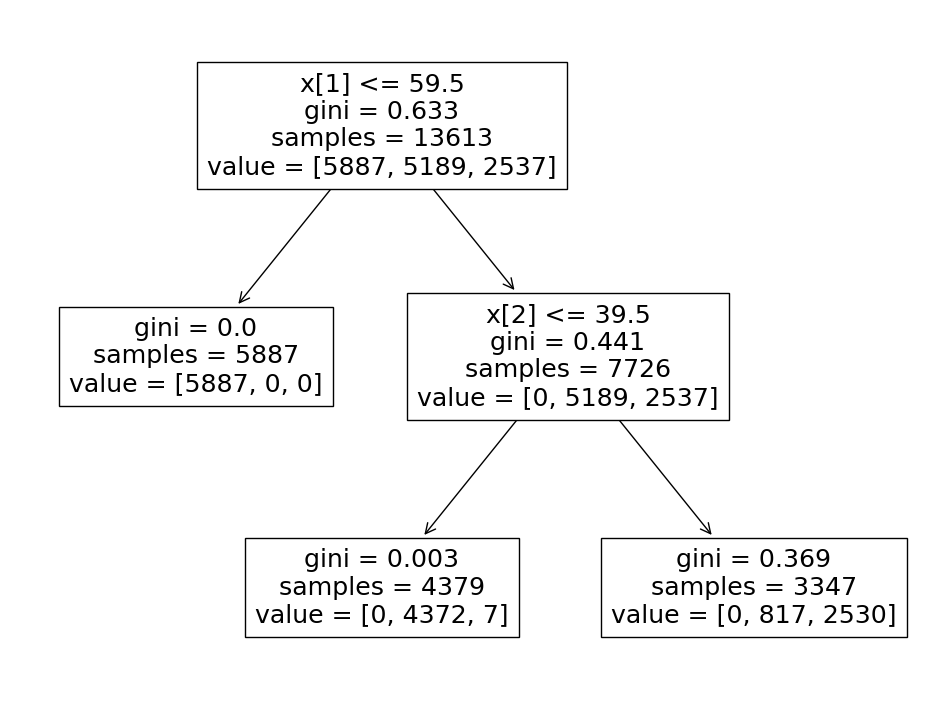

In [23]:
fig, ax = plt.subplots(figsize = (12,9))

plot_tree(tree_3_leaf,ax = ax)
plt.show()

In [26]:
# Instaniate Desicion tree classifier with default hyperparameter setting

tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, Y_train)

# Predict the test data with trained tree classifier
y_predict = tree.predict(X_test)

# Print the test and classification report on test data
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9882491186839013
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.98      0.99      0.98      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.98      0.98      0.98      3404
weighted avg       0.99      0.99      0.99      3404



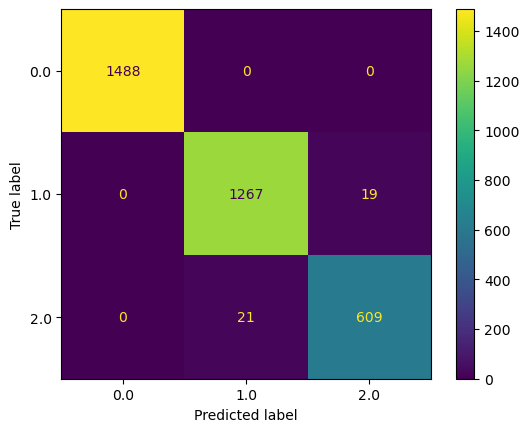

In [31]:
cmTree = confusion_matrix(Y_test, y_predict, labels=tree.classes_)
dispTree = ConfusionMatrixDisplay(confusion_matrix=cmTree,
                               display_labels=tree.classes_)
dispTree.plot()
plt.show()

### Random Forest Classifier

In [32]:
# Instaniate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train the classifier on the training model
rf.fit(X_train, Y_train)

# Predict the test data with trained tree classifier
y_predict = rf.predict(X_test)

# Print the test and classification report on test data
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9900117508813161
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



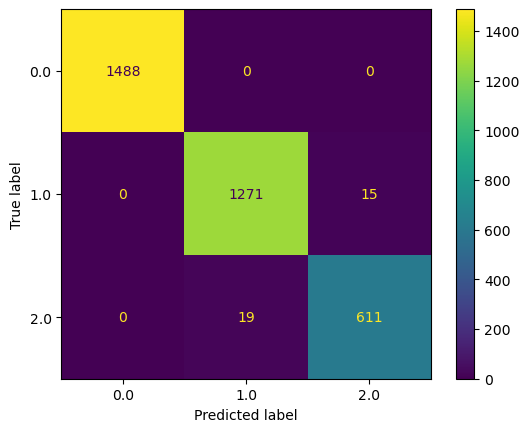

In [33]:
rfTree = confusion_matrix(Y_test, y_predict, labels=rf.classes_)
dispRf = ConfusionMatrixDisplay(confusion_matrix=rfTree,
                               display_labels=rf.classes_)
dispRf.plot()
plt.show()

runtime = 0.010838290843263354
tomatometer_rating = 0.5104799512608007
tomatometer_count = 0.18111082175607984
audience_rating = 0.08668284255459763
audience_count = 0.027109985271831828
tomatometer_rotten_critics_count = 0.12968642394289753
G = 0.0006056544500073477
NC17 = 2.6456373463483272e-05
NR = 0.013490716341830366
PG = 0.0007302326798308264
PG-13 = 0.0029266842303582756
R = 0.002003847332244704
audience_status = 0.03430809296279404


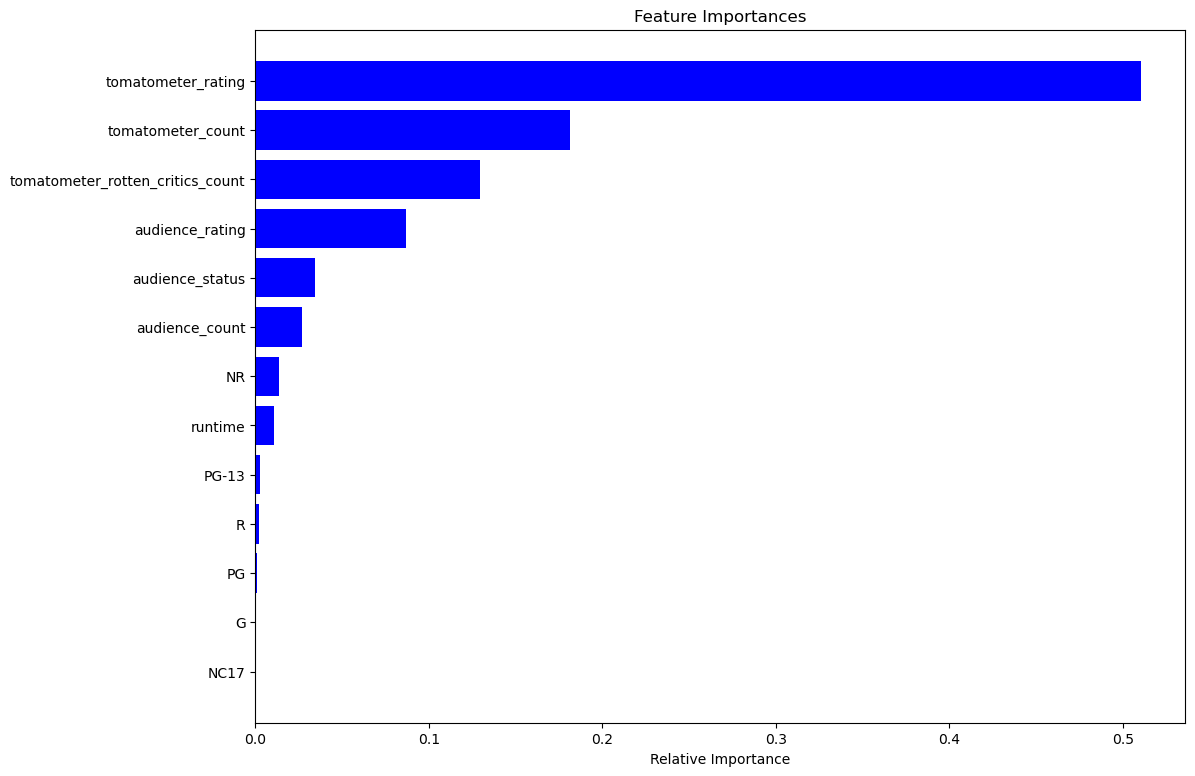

In [39]:
# Get the feature importance
feature_importance = rf.feature_importances_

# print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# visualize feature from the most important to the least important

indices = np.argsort(feature_importance)

plt.figure(figsize = (12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)),feature_importance[indices], color='b', align = 'center')
plt.yticks(range(len(indices)),[X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
# Split the data into train and aftere feature classifier

X_train, X_test, Y_train, Y_test  = train_test_split(df_feature.drop(['tomatometer_status','NR', 'runtime', 'PG-13', 'R', 'G', 'NC17'],axis=1),df_feature.tomatometer_status, test_size=0.2, random_state= 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


> Random forest classifier examplefies feature selection, where we add and remove feature to improve the model's performance

In [41]:
# Instaniate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train the classifier on the training model
rf.fit(X_train, Y_train)

# Predict the test data with trained tree classifier
y_predict = rf.predict(X_test)

# Print the test and classification report on test data
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9905992949471211
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



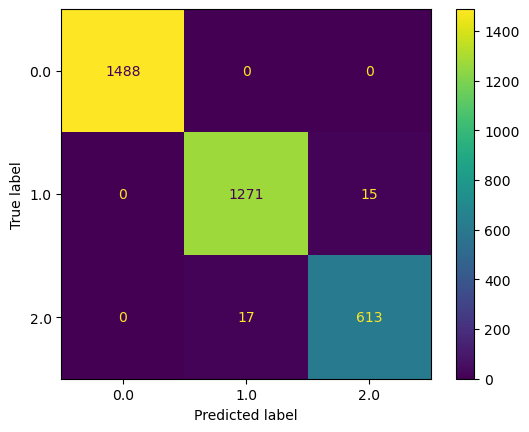

In [42]:
rfTree = confusion_matrix(Y_test, y_predict, labels=rf.classes_)
dispRf = ConfusionMatrixDisplay(confusion_matrix=rfTree,
                               display_labels=rf.classes_)
dispRf.plot()
plt.show()

> This domestrate that having more features do not necessarily lead to a better model

> Some unimportant features may introduce noise ,negatively impacting the accuracy of the model's prediction

### Weighted Random Forest classifier with feature selection 

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

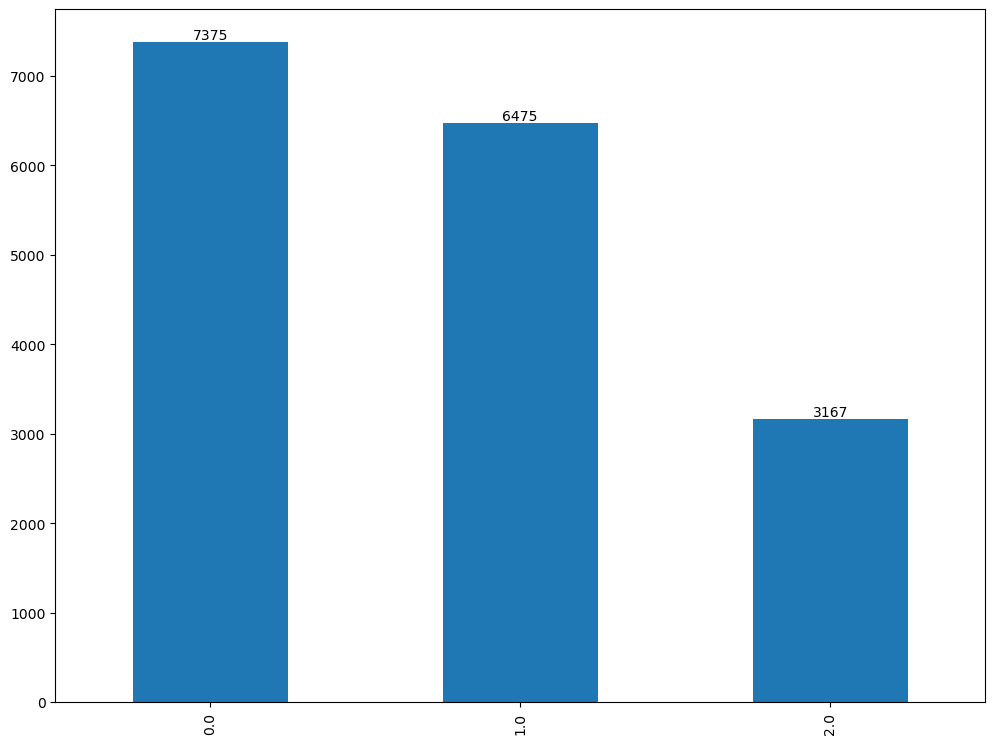

In [43]:
# Check the distridution of target variable once more
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize = (12,9))
ax.bar_label(ax.containers[0])

> Imbalance data can be identified as having many observations of some type and very few of another type

> **SMOTE**(Synthetic Minority Oversampling Technique) can be used to address data imbalance

In [45]:
# Compute class weight

class_weight = compute_class_weight(class_weight = 'balanced', classes = np.unique(df_feature.tomatometer_status),
                                   y = df_feature.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

0.9914806110458284
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



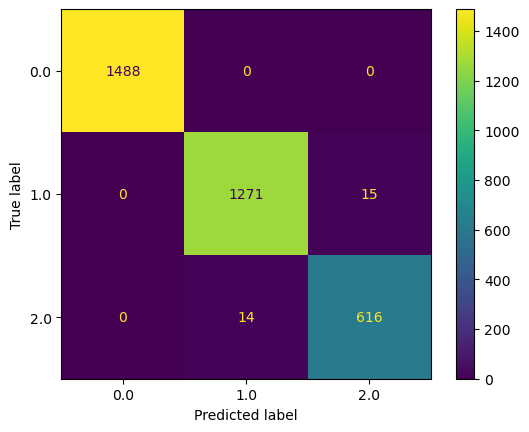

In [51]:
# Instaniate Random Forest Classifier
rf_weighted = RandomForestClassifier(random_state=2, class_weight= class_weight_dict)

# Train the classifier on the training model
rf_weighted.fit(X_train, Y_train)

# Predict the test data with trained tree classifier
y_predict = rf_weighted.predict(X_test)

# Print the test and classification report on test data
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

rf_weightedTree = confusion_matrix(Y_test, y_predict, labels=rf_weighted.classes_)
dispRf = ConfusionMatrixDisplay(confusion_matrix=rf_weightedTree,
                               display_labels=rf_weighted.classes_)
dispRf.plot()
plt.show()

> Using class weight is effective way to address imbalance data problem

##  Analyzing Review Sentiment for Accurate Ratings

In [59]:
df_critics = pd.read_csv('/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv')

In [62]:
df_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [64]:
# Merge critics dataframe with movie dataframe

df_merged = df_critics.merge(df_movies, how = 'inner', on = ['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link','movie_title', 'review_content', 'review_type', 'tomatometer_status']]

df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


[Text(0, 0, '680954'), Text(0, 0, '383155')]

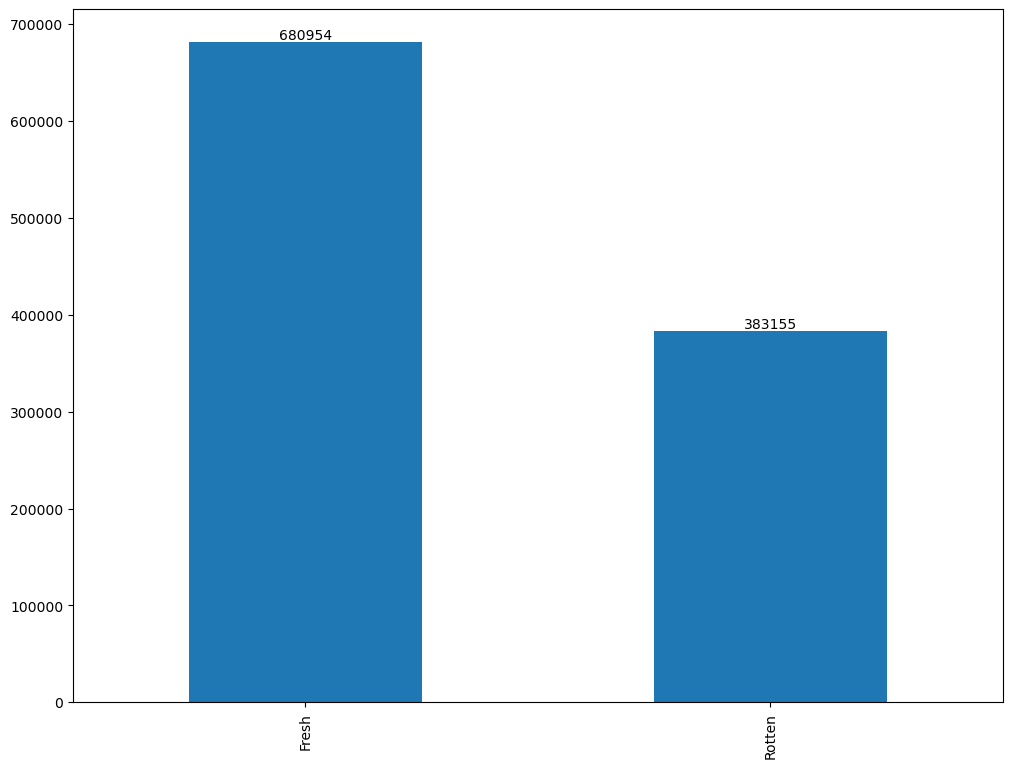

In [65]:
# Drop entries with the values
df_merged = df_merged.dropna(subset=['review_content'])

# Plot distribution of the review
ax = df_merged.review_type.value_counts().plot(kind='bar', figsize = (12,9))
ax.bar_label(ax.containers[0])

In [66]:
# Pick only 5000 entries
df_sub = df_merged[0:5000]

# Encode the lebals
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten', 'Fresh'],[0,1]))

# Encode the lebals
df_feature_critics = pd.concat([df_sub[['review_content']],review_type],axis = 1).dropna()

df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


In [68]:
# Split the data into train and test data

X_train, X_test, Y_train, Y_test  = train_test_split(df_feature_critics['review_content'],df_feature_critics['review_type'], test_size=0.2, random_state= 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 4000 and the size of test data is 1000


> We need to convert these strings into a format that can be used by a machine learning algirithm. This process is called **Tokenization** in Natural Language Processing

> With tokenization, we transform text or words into N-Dimensional vectors,and then use these vector representations as training data fro our machine learning algorithm

In [79]:
# Instaniate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform text into vector
x_train_vec = vectorizer.fit_transform(X_train).toarray()

# Instaniate random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(x_train_vec, Y_train)



# Predict and output classifier report
y_predicted = rf.predict(vectorizer.transform(X_test).toarray())

print(classification_report(Y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



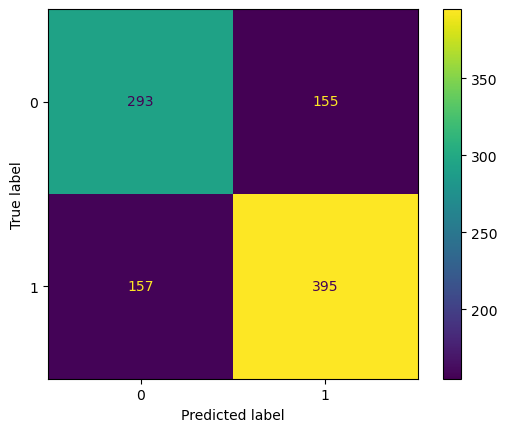

In [80]:
vec = confusion_matrix(Y_test, y_predicted, labels=rf.classes_)
dispRf = ConfusionMatrixDisplay(confusion_matrix=vec,
                               display_labels=rf.classes_)
dispRf.plot()
plt.show()

In [78]:
# Compute class weight

review_weight = compute_class_weight(class_weight = 'balanced', classes = np.unique(df_feature_critics.review_type),
                                   y = df_feature_critics.review_type.values)

review_weight_dict = dict(zip(range(len(review_weight.tolist())), review_weight.tolist()))
review_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

In [82]:
# Instaniate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform text into vector
x_train_vec = vectorizer.fit_transform(X_train).toarray()

# Instaniate random forest and train it
rf_review_weighted = RandomForestClassifier(random_state=2, class_weight=review_weight_dict)
rf_review_weighted.fit(x_train_vec, Y_train)



# Predict and output classifier report
y_review_predicted = rf_review_weighted.predict(vectorizer.transform(X_test).toarray())

print(classification_report(Y_test, y_review_predicted))


              precision    recall  f1-score   support

           0       0.64      0.72      0.68       448
           1       0.74      0.67      0.70       552

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000



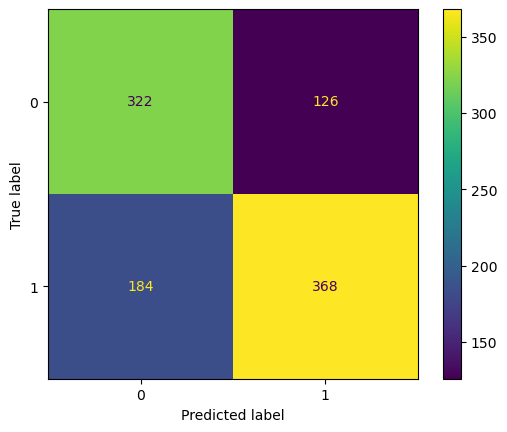

In [84]:
vec_review = confusion_matrix(Y_test, y_review_predicted, labels=rf.classes_)
dispRf = ConfusionMatrixDisplay(confusion_matrix=vec_review,
                               display_labels=rf.classes_)
dispRf.plot()
plt.show()

In [86]:
# Function for predict movie status based on the overall sentiment

def predict_movie_status(prediction):
    
    '''Assign lable based on prediction'''
    positive_percentage = (prediction == 1).sum()/len(prediction)**100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status:{prediction}')

In [91]:
# Gather all of the review of body of lies movie
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [93]:
# Get the prediction 

y_predicted_bol = rf_review_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicted_bol)

Positive review:0.00%
Movie status:Rotten
